In [51]:
import glob
import os
import librosa
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.metrics import accuracy_score


#Read the audio files. Get the mfcc features by librosa and label from the filename
def extract_features(parent_dir,sub_dirs,file_ext="*.wav",bands = 13,frames = 3):
    mfccs = np.array([]).reshape(0,13)
    labels = np.array([]).reshape(0,1)
  
    #Read the audio files.
    for l, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            sound_clip,s = librosa.load(fn)
            #Read the audio files.Use space to split the filename, and get the label
            label = fn.split('/')[2].split(' ')[0] 
            mfcc = librosa.feature.mfcc(y=sound_clip, sr=s,n_mfcc = bands).T
            len_mfcc = len(mfcc)

            # For one audio file,give each line of mfccs features one same label.
            label_mfcc = np.full((len_mfcc,1),label)
            mfccs = np.append(mfccs,mfcc, axis = 0)
            labels = np.append(labels,label_mfcc, axis = 0)
            

    return np.array(mfccs), np.array(labels)

#Train and test data, call the function extract_features
#The parent folder name changes to Training_Test_Data.
print('Extracting Training Features...')

parent_dir = 'Training_Test_Data'
tr_sub_dirs = ['training_data']
tr_features,tr_labels = extract_features(parent_dir,tr_sub_dirs)

print('Extracting Test Features...')
ts_sub_dirs = ['test_data']
ts_features,ts_labels = extract_features(parent_dir,ts_sub_dirs)

#Train the classifier
#Use fit function to fit the model using X as training data and y as target values.
print('Training classifier...')
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(tr_features, tr_labels)
    
#Use score funciton to returns the mean accuracy on the given test data and labels.
print('Testing accuracy...')
pr_labels=neigh.predict(ts_features)
print(neigh.score(ts_features,ts_labels))



Extracting Training Features...
Extracting Test Features...
Training classifier...


/Users/wittamer/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Testing accuracy...
0.737850351677


Normalized confusion matrix
[[  0.00e+00   5.74e-01   2.49e+00   5.74e-01   0.00e+00   0.00e+00
    0.00e+00   1.34e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   5.74e-01   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   2.10e+00   5.74e+00   0.00e+00
    0.00e+00]
 [  1.69e+01   6.31e+00   6.98e+00   2.99e+00   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   6.64e+00   0.00e+00   2.33e+00   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00   1.33e+00
    0.00e+00]
 [  2.95e+01   1.95e+01   1.10e+01   3.90e+00   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00
    0.00e+00   1.82e+01   0.00e+00   2.60e+00   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   0.00e+00   0.00e+00   2.92e+00
    0.00e+00]
 [  3.95e+01   2.19e+01   2.02e+01   7.02e+00   0.00e+00   0.00e+00
    0.00e+00   0.00e+00   0.00e+00   0.00e+00 

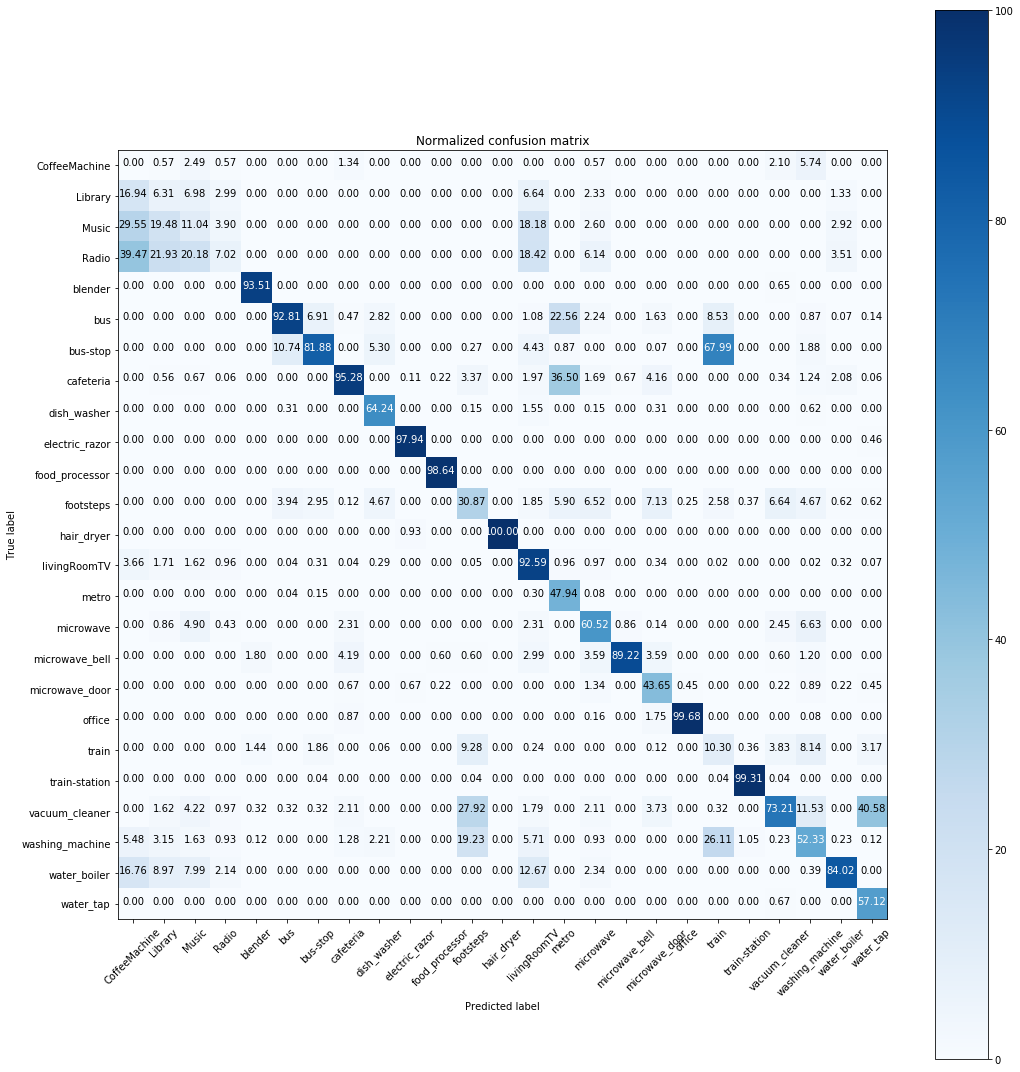

In [52]:
# plot function from sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Compute confusion matrix
cnf_matrix = confusion_matrix(ts_labels.flatten(), pr_labels)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix and save as pdf file
plt.figure(figsize=(15,15))
class_names = tr_labels
sorted_labels = np.unique(tr_labels.flatten())
plot_confusion_matrix(cnf_matrix, classes=sorted_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('Confusion matrix.pdf')
plt.show()


